In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-data')
jovian.set_colab_id('19pP-rOTmj-D5iogtODlH_OfTIi6xCprp')

# us-accident-data

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [81]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-data")

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

##US exploratory data analysis

Talk about EDA, datasets , source is 
Kaggle
Information about accident
Can be useful to prevent accidents

# dataset download from kaggle

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
download_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'

In [ ]:
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonusu08
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:03<00:00, 101MB/s]


##data preparation and cleaning

1. load the file using pandas
2. collect info of coloumn and rows
3. fix the missing values

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/us-accidents/US_Accidents_Dec20_Updated.csv')

In [ ]:
df

In [ ]:
df.shape


(2906610, 47)

In [ ]:
df.info()

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

percentage of missing values per column 

In [ ]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages
#type(missing_percentages)

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [ ]:
missing_percentages[missing_percentages != 0]


Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

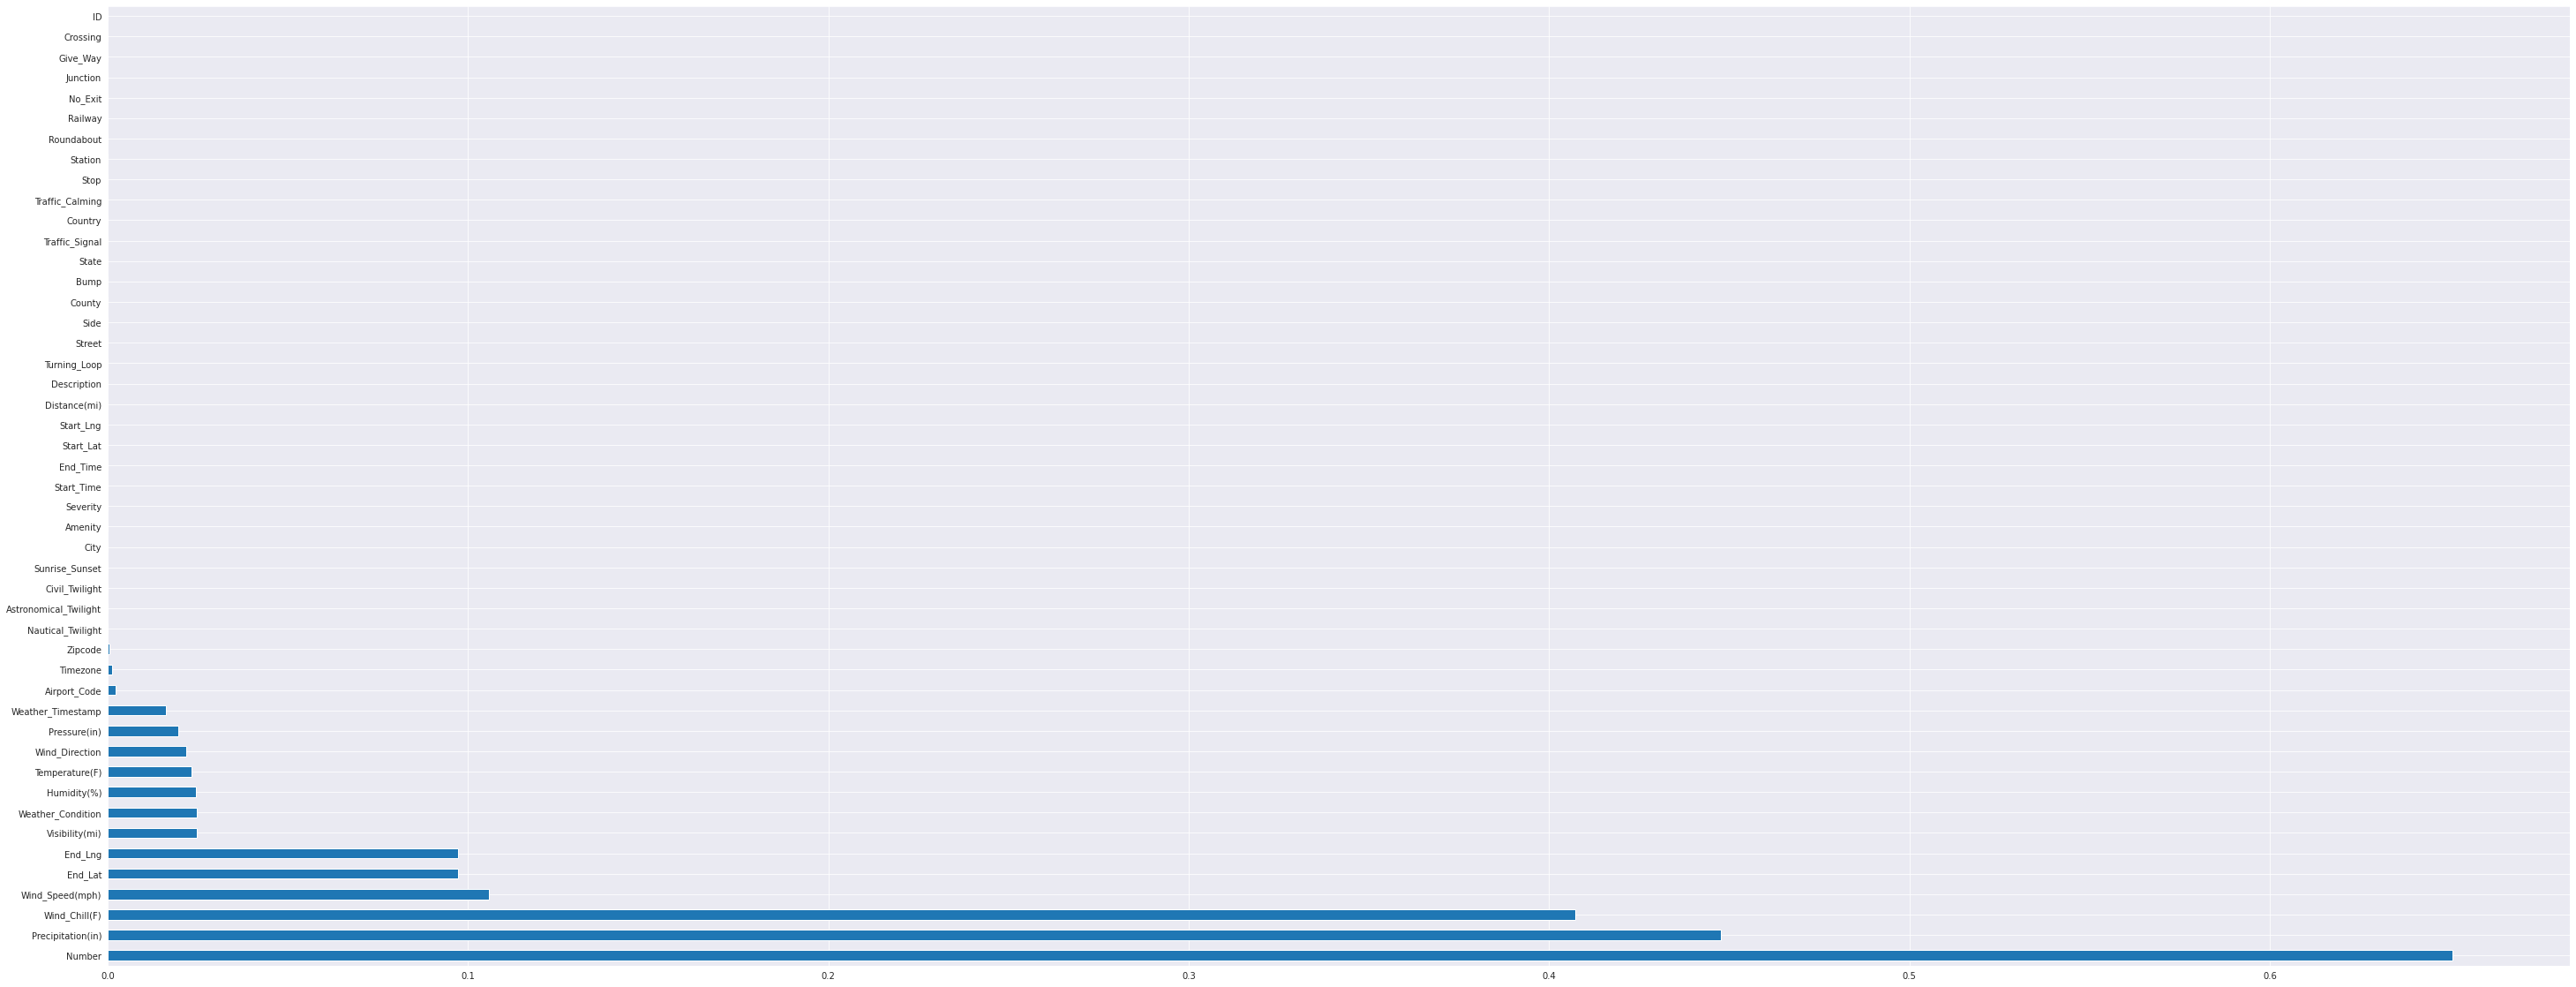

In [ ]:
missing_percentages.plot(kind='barh')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

## Remove those column that u dont want to use

##Exploratory analysis and visulazation
cloumn will be analysed: 

1.city

2.start time

3.start lat, start lng

4.temperature

5.weather condition

### City

In [ ]:
df.City

In [ ]:
cities=df.City.unique()
len(cities)


11790

In [ ]:
city_by_accident=df.City.value_counts()
city_by_accident

Los Angeles           68411
Houston               68265
Charlotte             56176
Miami                 49965
Dallas                48525
                      ...  
Coleharbor                1
Grenora                   1
Hansen                    1
Grosse Pointe Park        1
Wolbach                   1
Name: City, Length: 11789, dtype: int64

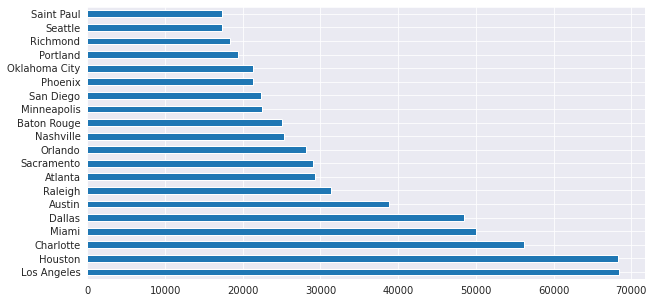

In [ ]:
city_by_accident[: 20].plot(kind='barh')

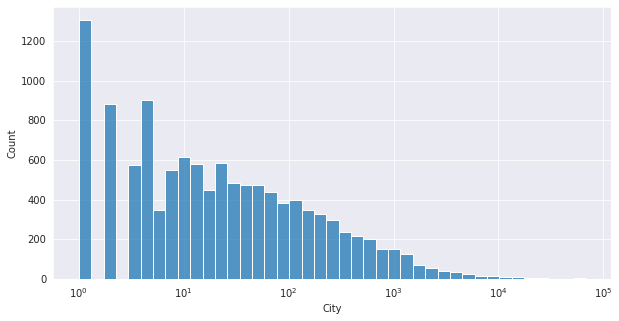

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(city_by_accident, log_scale=True)

#means more tha 1300 cities have only one accients

In [ ]:
city_by_accident[city_by_accident==1]


Martelle              1
Staffordsville        1
Tridell               1
Lupton City           1
Trilla                1
                     ..
Coleharbor            1
Grenora               1
Hansen                1
Grosse Pointe Park    1
Wolbach               1
Name: City, Length: 1306, dtype: int64

###Start time

we cant not plot for date so we can pull out pieces of info and store it into new columns.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


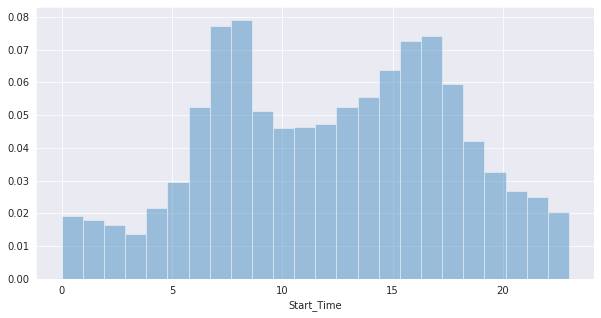

In [28]:
df.Start_Time=pd.to_datetime(df.Start_Time)
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)



High percentage of accident occue between 7 am to 9 am coz traffic is higher .


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


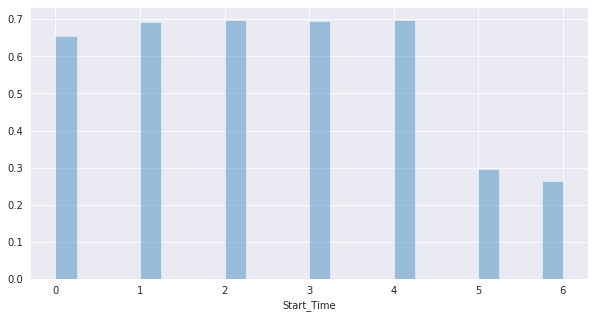

In [29]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


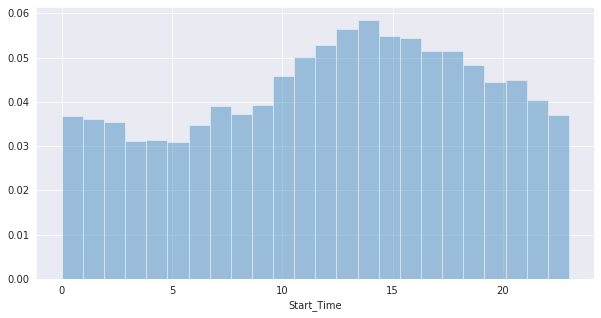

In [45]:
Sundays_Start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(Sundays_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)

on sunday most accident occurs between 10am to 8 pm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


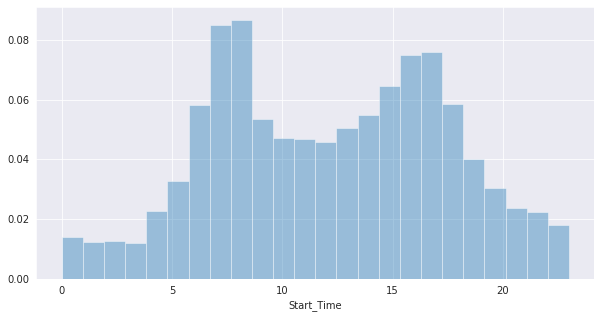

In [46]:
Mondayss_Start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(Mondayss_Start_time.dt.hour,bins=24,kde=False,norm_hist=True)

On monday most accidents occurs between 6am to 10am and 3 pm to 6pm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


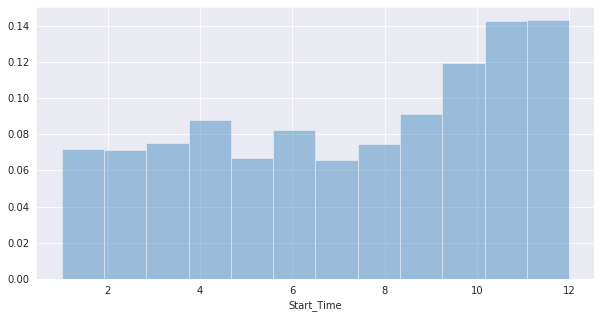

In [47]:
sns.distplot(Mondayss_Start_time.dt.month,bins=12,kde=False,norm_hist=True)

## Start_lattitude and Longitude

In [51]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

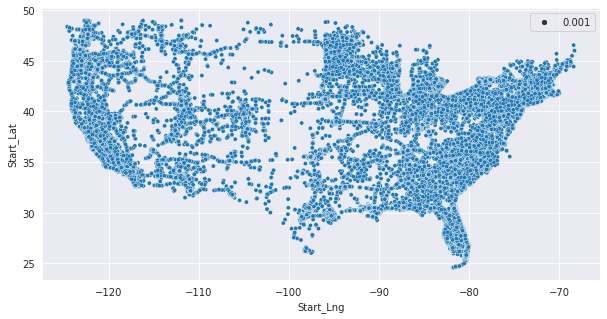

In [62]:
sample_df=df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [63]:
import folium

In [78]:
lat, lon=df.Start_Lat[0],df.Start_Lng[0]

In [ ]:
for x in df.sample(100)

In [79]:

map=folium.Map(location=[lat,lon], zoom_start=5)
marker=folium.Marker((lat,lon))
marker.add_to(map)

map

##  ask Question and answer
1.Are there more accidents in warmer or colder areas?

2.Which states has higher no of accidents ? how about per capita of state?

3.Newyork is not present here but newyork has higest population

4.Among top 100 cities in number of accident, which state do they belong frequently.

5.What time of day accident mostly occur?

6.Which month have more accident?

7.Which day of week have more accidents?

8.what is trends of accidents year by year?
9.when is accident per unit of traffic is higher?
10. Is the distribution of accidents by hour is same on weekends as on weekdays?




##Conclusion
1. No data for Newyork city
2.less than 5% of city have more than 1000 yearly accident
3. over 1300 cities reported 1 accident only so need to envestigate
4. Number of accidents pr city decreases exponentially
5.High percentage of accident occue between 7 am to 9 am coz traffic is higher .
6.Higher accidents occurs in weekdays
7.On monday most accidents occurs between 6am to 10am and 3 pm to 6pm
8.on sunday most accident occurs between 10am to 8 pm